In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = 'Supply_Chain_Shipment_Pricing_Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   id project code            pq # po / so # asn/dn #        country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  managed by  fulfill via vendor inco term shipment mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  unit of measure (per pack) line item quantity line item value pack price  \
0                         30                 19           551.0      29.00   
1                   

In [6]:
# Step 1: Data Understanding and Initial Exploration
print(data.isnull().sum())  # Check for missing values
print(data.describe())      # Get a statistical summary
print(data.dtypes)          # Check data types

id                                 0
project code                       0
pq #                               0
po / so #                          0
asn/dn #                           0
country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
u

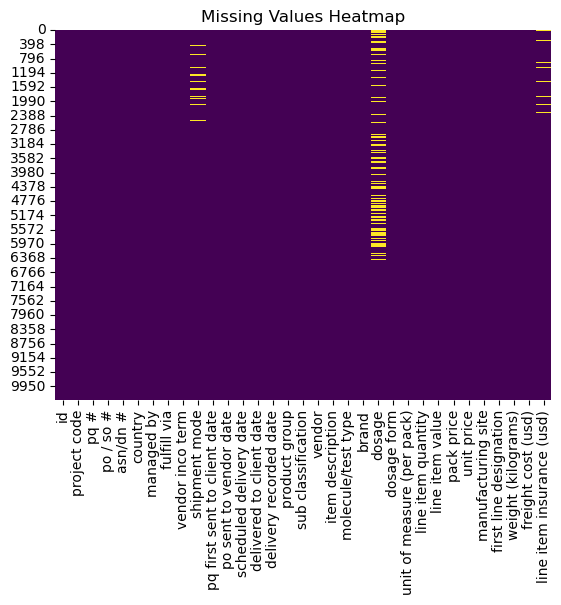

In [7]:
# Visualize missing values heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Step 2: Data Cleaning and Preparation
data = data.dropna()  # Dropping rows with missing values

# Ensure the target variable 'freight cost (usd)' is numerical
data['freight cost (usd)'] = pd.to_numeric(data['freight cost (usd)'], errors='coerce')

# Drop any rows with missing values in the 'freight cost (usd)' column
data = data.dropna(subset=['freight cost (usd)'])

In [9]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Alternatively, check only the 'freight cost (usd)' column for missing values
missing_cost = data['freight cost (usd)'].isnull().sum()
print(f"Missing values in 'freight cost (usd)': {missing_cost}")

Missing values in each column:
 id                              0
project code                    0
pq #                            0
po / so #                       0
asn/dn #                        0
country                         0
managed by                      0
fulfill via                     0
vendor inco term                0
shipment mode                   0
pq first sent to client date    0
po sent to vendor date          0
scheduled delivery date         0
delivered to client date        0
delivery recorded date          0
product group                   0
sub classification              0
vendor                          0
item description                0
molecule/test type              0
brand                           0
dosage                          0
dosage form                     0
unit of measure (per pack)      0
line item quantity              0
line item value                 0
pack price                      0
unit price                      0
manufacturing si

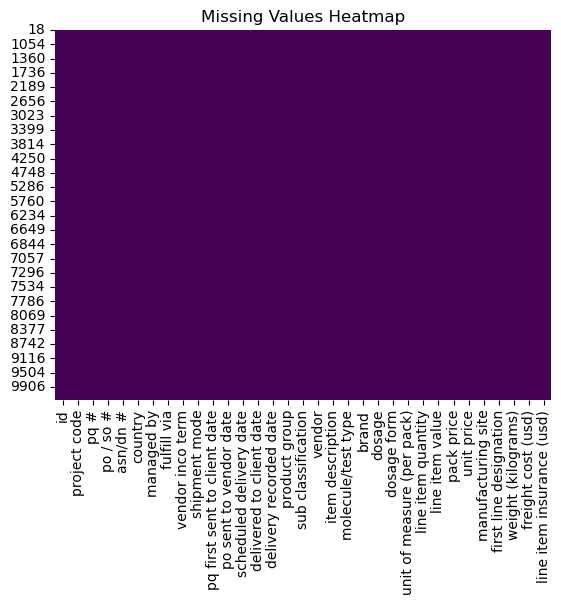

In [10]:
# Visualize missing values heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [17]:
# Encode categorical features using one-hot encoding
data = pd.get_dummies(data, drop_first=True)
print(data.head())  # Check the structure of the dataset

       id  unit of measure (per pack)  line item quantity  line item value  \
18  81483                          60                 525           3465.0   
23    115                         240                1000           1920.0   
24    116                         120                 500          41095.0   
30    161                          60               64000          99200.0   
33    269                          30                1000          17000.0   

    pack price  unit price  first line designation  freight cost (usd)  \
18        6.60        0.11                    True              807.47   
23        1.92        0.01                    True             4193.49   
24       82.19        0.68                    True             1767.38   
30        1.55        0.03                    True            12237.61   
33       17.00        0.57                    True             2282.57   

    line item insurance (usd)  project code_100-BZ-T30  ...  \
18                     

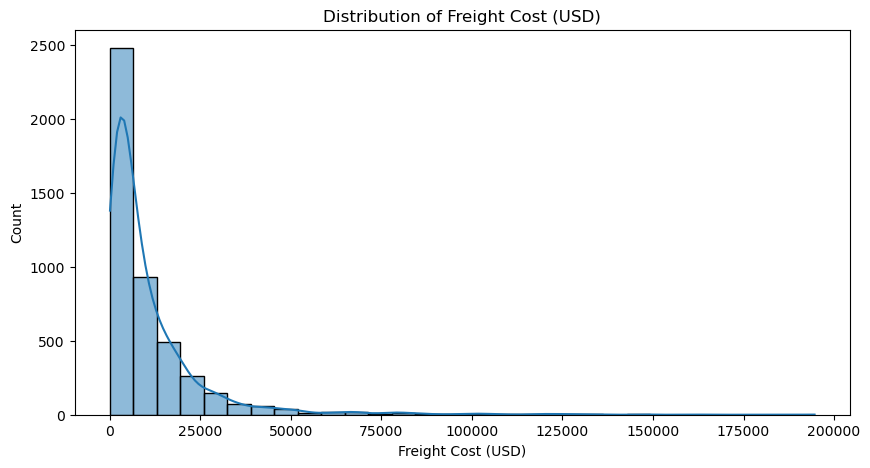

In [19]:
# Step 3: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution plot for the target variable
plt.figure(figsize=(10, 5))
sns.histplot(data['freight cost (usd)'], bins=30, kde=True)
plt.title('Distribution of Freight Cost (USD)')
plt.xlabel('Freight Cost (USD)')
plt.show()


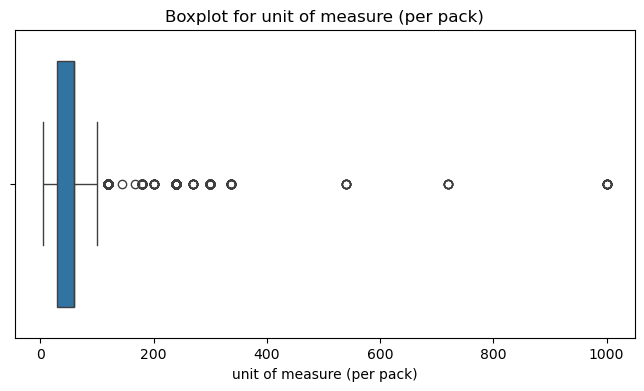

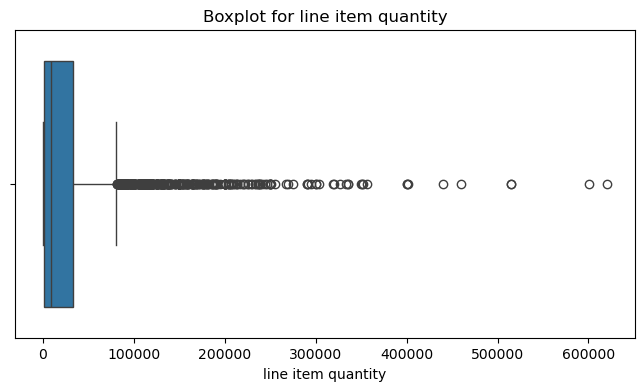

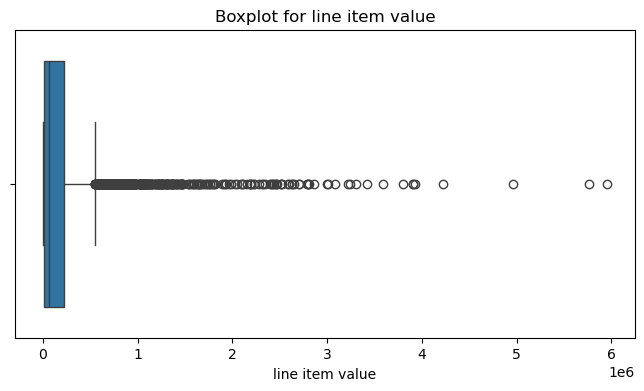

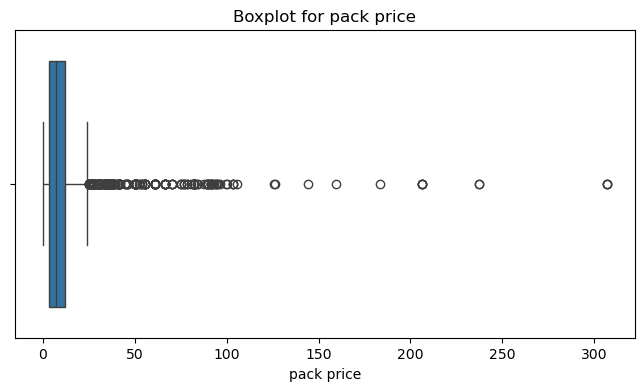

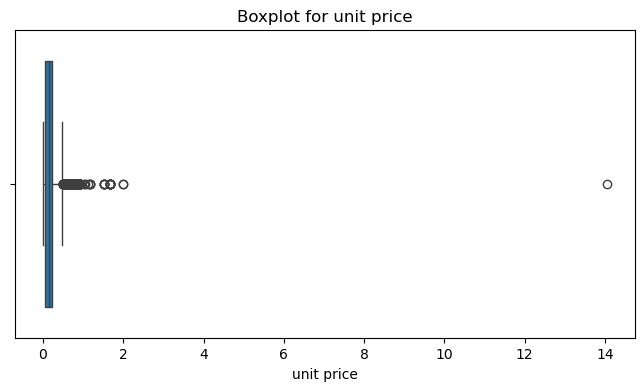

In [21]:
# Outlier detection using boxplots
outlier_columns = ['unit of measure (per pack)', 'line item quantity', 'line item value', 'pack price', 'unit price']
for col in outlier_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()


In [22]:
# Step 4: Feature Selection and Data Splitting
X = data.drop('freight cost (usd)', axis=1)
y = data['freight cost (usd)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Step 5: Model 1 - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Train the model

# Make predictions
lr_preds = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression MAE:", lr_mae)
print("Linear Regression R²:", lr_r2)

Linear Regression RMSE: 12289.422434016285
Linear Regression MAE: 6633.434209397909
Linear Regression R²: 0.26906542887754514


C:\Users\noora\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
# Display evaluation metrics in a table format
metrics_table = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "R² Score"],
    "Linear Regression": [lr_rmse, lr_mae, lr_r2]
})
print("\nModel Evaluation Metrics for Linear Regression")
print(metrics_table)


Model Evaluation Metrics for Linear Regression
     Metric  Linear Regression
0      RMSE       12289.422434
1       MAE        6633.434209
2  R² Score           0.269065


In [27]:
# Step 6: Extracting and Visualizing the Regression Equation
# Retrieve intercept and coefficients
intercept = lr_model.intercept_
coefficients = lr_model.coef_
feature_names = X.columns

# Print the regression equation
print("\nRegression Equation:")
equation = f"freight cost (usd) = {intercept:.2f}"
for i, coef in enumerate(coefficients):
    equation += f" + ({coef:.2f} * {feature_names[i]})"
print(equation)



Regression Equation:
freight cost (usd) = 10855.85 + (77.29 * id) + (-0.02 * unit of measure (per pack)) + (805.71 * line item quantity) + (760.41 * line item value) + (-96.76 * pack price) + (-76.87 * unit price) + (100.19 * first line designation) + (696.72 * line item insurance (usd)) + (38.64 * project code_100-BZ-T30) + (-42.97 * project code_100-DO-T30) + (35.20 * project code_100-GH-T30) + (-6.58 * project code_100-SZ-T01) + (23.05 * project code_100-ZM-T30) + (48.61 * project code_100-ZW-T01) + (-56.95 * project code_100-ZW-T30) + (73.48 * project code_101-AF-T30) + (-68.36 * project code_101-CD-T30) + (-104.20 * project code_102-BI-T30) + (26.63 * project code_102-CD-T30) + (16.95 * project code_102-DO-T30) + (-22.90 * project code_102-KE-T30) + (-10.28 * project code_102-LY-T30) + (200.75 * project code_102-UG-T30) + (-75.30 * project code_102-ZW-T30) + (10.53 * project code_103-AO-T30) + (22.29 * project code_103-CM-T30) + (-3.39 * project code_103-DO-T30) + (14.65 * projec

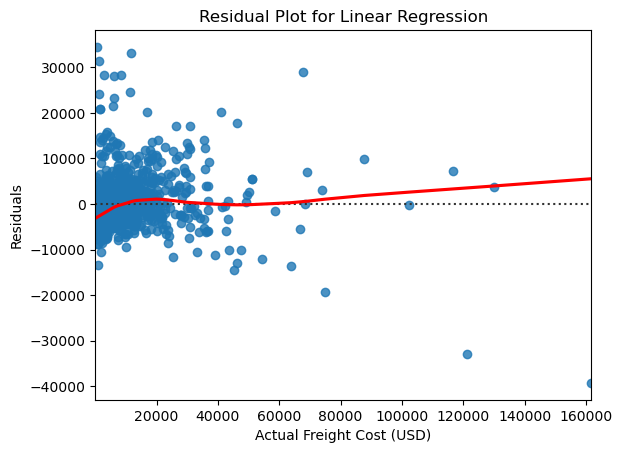

In [28]:
# Residual Plot 
sns.residplot(x=y_test, y=lr_preds, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Actual Freight Cost (USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

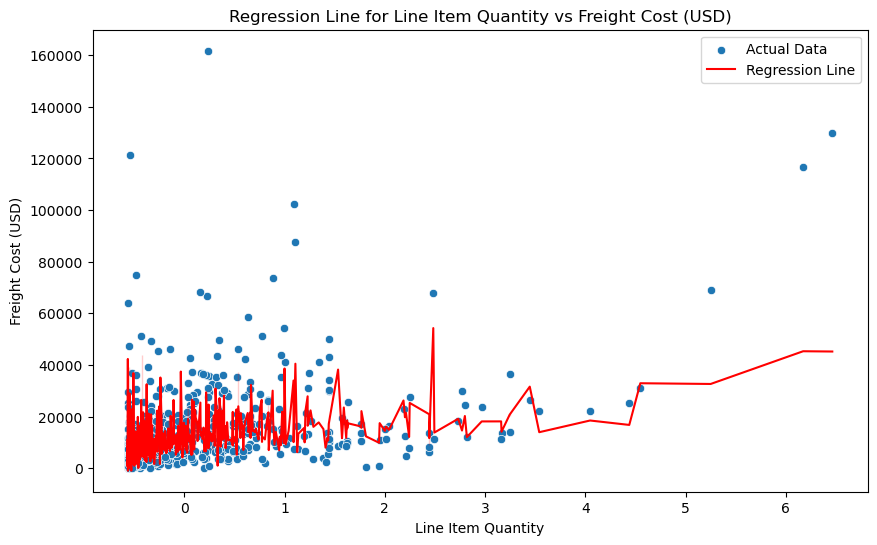

In [29]:
# Visualize regression with one key feature (e.g., 'line item quantity')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, feature_names.get_loc('line item quantity')],
                y=y_test, label="Actual Data")
sns.lineplot(x=X_test[:, feature_names.get_loc('line item quantity')],
             y=lr_model.predict(X_test), color="red", label="Regression Line")
plt.title('Regression Line for Line Item Quantity vs Freight Cost (USD)')
plt.xlabel('Line Item Quantity')
plt.ylabel('Freight Cost (USD)')
plt.legend()
plt.show()

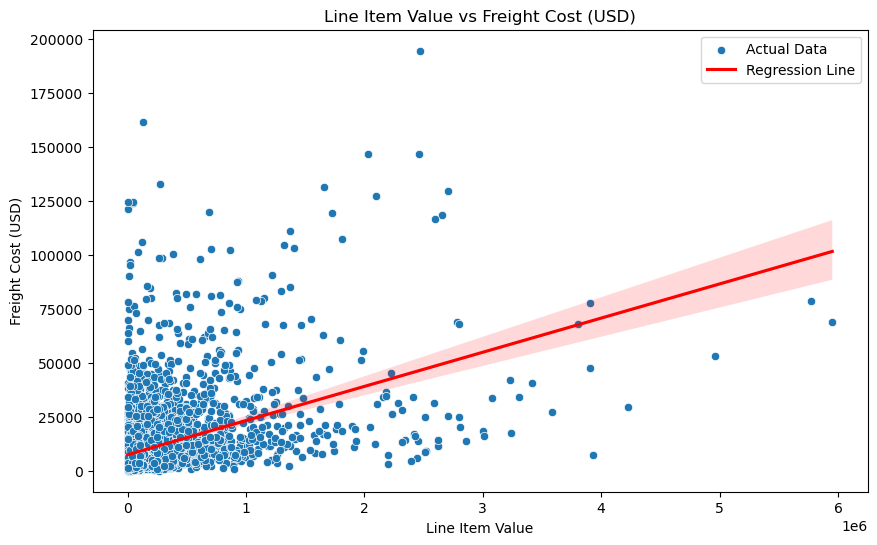

In [30]:
# Scatter plot for 'line item value' vs 'freight cost (usd)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='line item value', y='freight cost (usd)', label='Actual Data')
sns.regplot(data=data, x='line item value', y='freight cost (usd)', scatter=False, color='red', label='Regression Line')
plt.title('Line Item Value vs Freight Cost (USD)')
plt.xlabel('Line Item Value')
plt.ylabel('Freight Cost (USD)')
plt.legend()
plt.show()

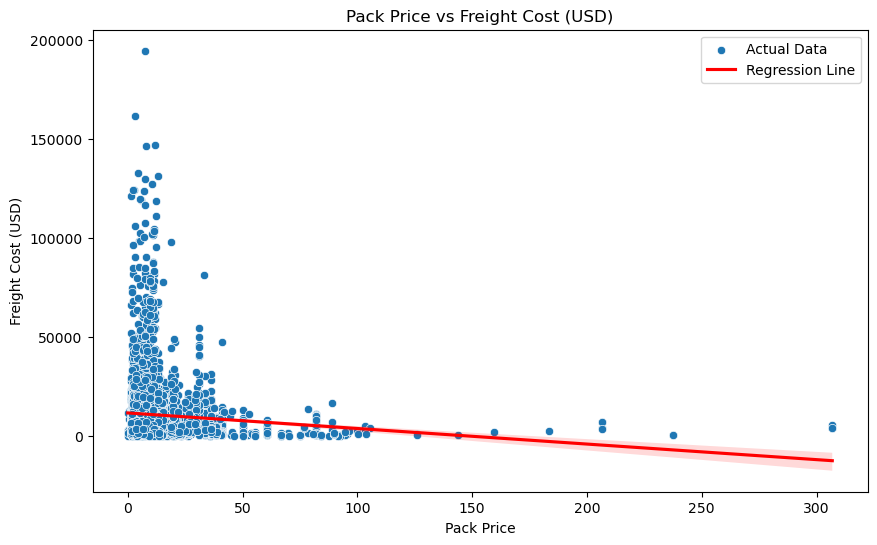

In [31]:
# Scatter plot for 'pack price' vs 'freight cost (usd)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='pack price', y='freight cost (usd)', label='Actual Data')
sns.regplot(data=data, x='pack price', y='freight cost (usd)', scatter=False, color='red', label='Regression Line')
plt.title('Pack Price vs Freight Cost (USD)')
plt.xlabel('Pack Price')
plt.ylabel('Freight Cost (USD)')
plt.legend()
plt.show()


Feature Importance (Linear Regression Coefficients)
                                             Feature  Coefficient
0                                                 id    77.285139
1                         unit of measure (per pack)    -0.017401
2                                 line item quantity   805.710382
3                                    line item value   760.405879
4                                         pack price   -96.759598
...                                              ...          ...
18802                        weight (kilograms)_9966   128.204171
18803                         weight (kilograms)_998   -11.754246
18804                        weight (kilograms)_9988     0.000000
18805                        weight (kilograms)_9996   -31.619480
18806  weight (kilograms)_Weight Captured Separately     3.050710

[18807 rows x 2 columns]


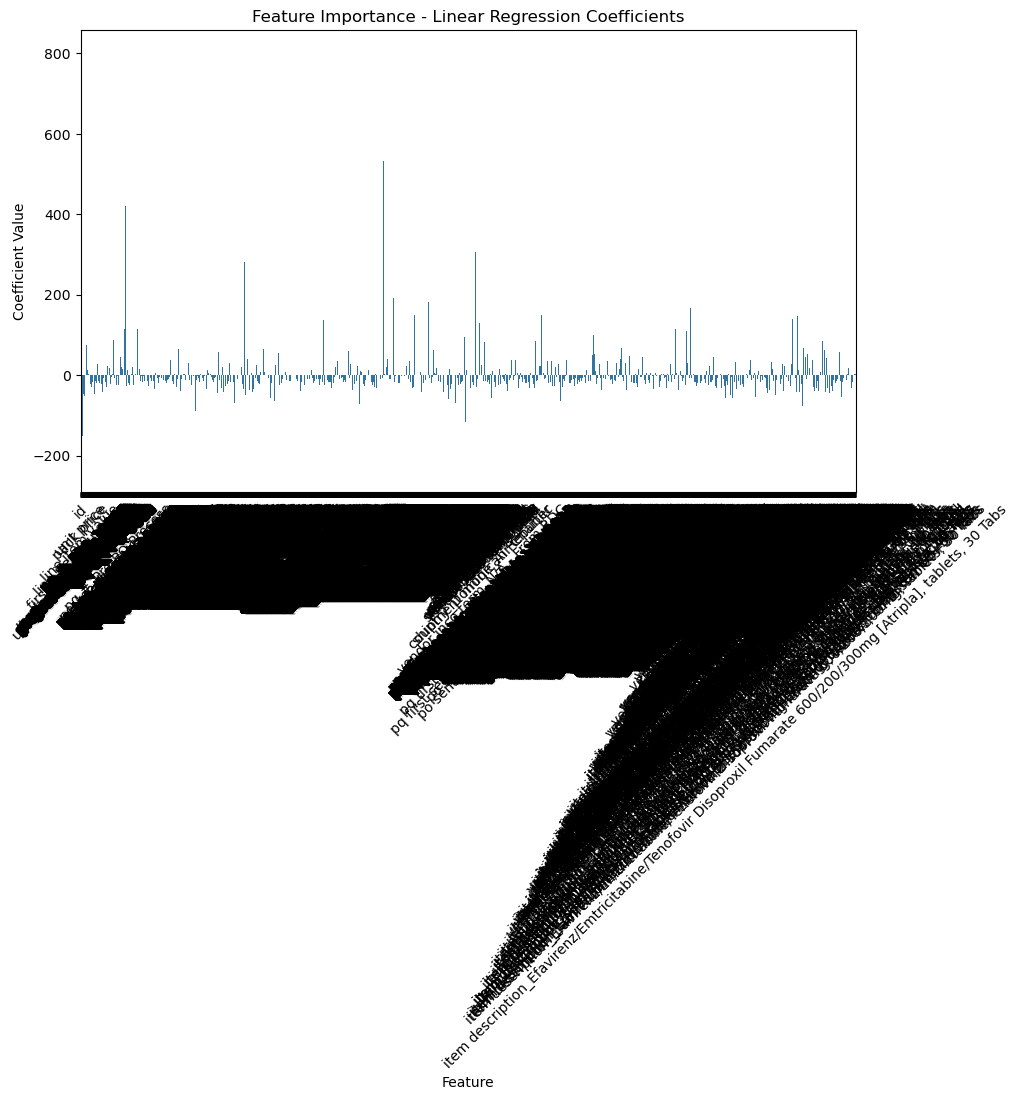

In [32]:

# Step 10: Visualizing Feature Importance (Coefficients)
# Extract and display feature importance from the linear regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print("\nFeature Importance (Linear Regression Coefficients)")
print(coefficients)

# Bar plot of feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Feature', y='Coefficient')
plt.title('Feature Importance - Linear Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()


In [33]:

# Sample input data for prediction
sample_input = {
    'line item quantity': 10,
    'line item value': 500,
    'unit price': 50,
    'pack price': 5,
    'unit of measure (per pack)': 1,
    'scheduled delivery date': '2024-11-25',
    'delivered to client date': '2024-11-30',
    'delivery recorded date': '2024-12-01',
}

# Convert dates to datetime and calculate additional features (e.g., delivery days)
sample_input['scheduled delivery date'] = pd.to_datetime(sample_input['scheduled delivery date'])
sample_input['delivered to client date'] = pd.to_datetime(sample_input['delivered to client date'])
sample_input['delivery recorded date'] = pd.to_datetime(sample_input['delivery recorded date'])

sample_input['delivery_days'] = (sample_input['delivered to client date'] - sample_input['scheduled delivery date']).days
sample_input['recorded_days'] = (sample_input['delivery recorded date'] - sample_input['delivered to client date']).days

# Drop the original date columns for prediction
sample_input.pop('scheduled delivery date')
sample_input.pop('delivered to client date')
sample_input.pop('delivery recorded date')

# Convert to DataFrame
sample_input_df = pd.DataFrame([sample_input])

# Ensure it matches the training set structure
sample_input_df = pd.get_dummies(sample_input_df, drop_first=True)
sample_input_df = sample_input_df.reindex(columns=X.columns, fill_value=0)

# Standardize the input using the same scaler
sample_input_scaled = scaler.transform(sample_input_df)

# Make the prediction
predicted_cost = lr_model.predict(sample_input_scaled)
print(f"Predicted Freight Cost (USD): {predicted_cost[0]:.2f}")

Predicted Freight Cost (USD): -3254.97


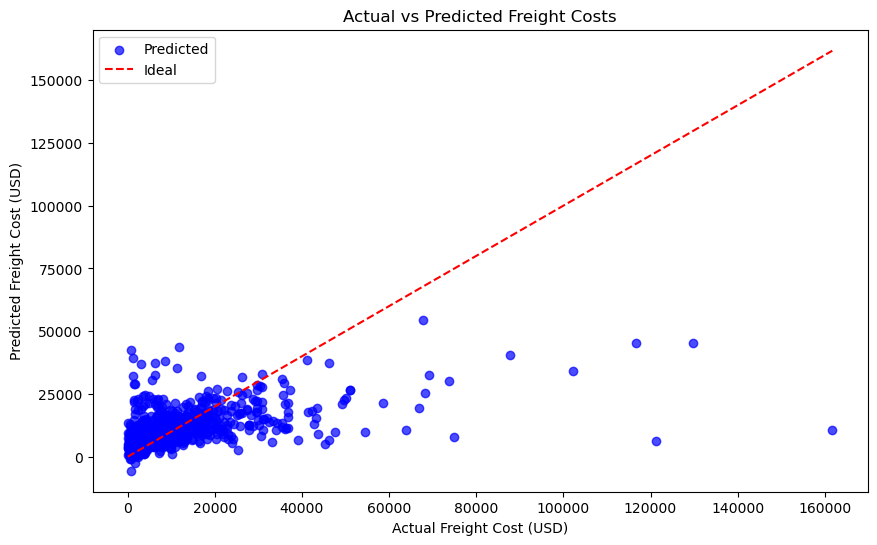

In [34]:
# Comparison of Actual vs Predicted Freight Costs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_preds, alpha=0.7, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.title('Actual vs Predicted Freight Costs')
plt.xlabel('Actual Freight Cost (USD)')
plt.ylabel('Predicted Freight Cost (USD)')
plt.legend()
plt.show()

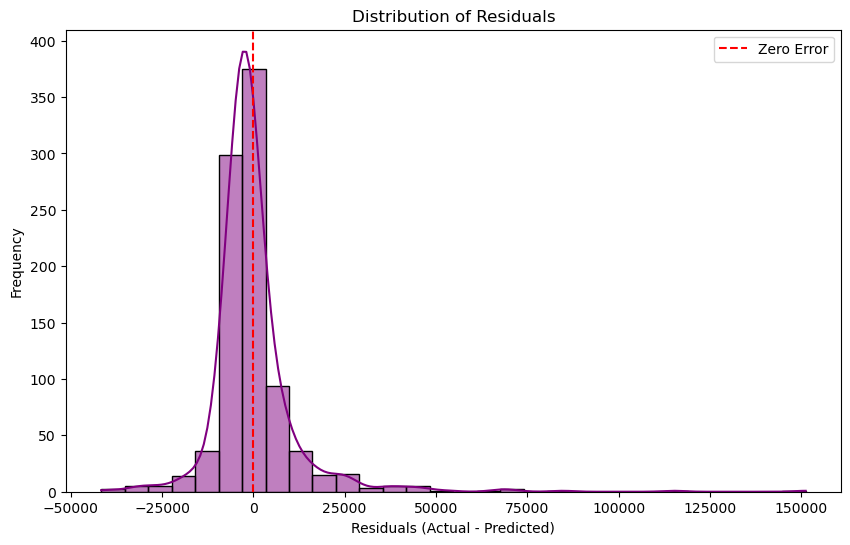

In [26]:
# Residual distribution
residuals = y_test - lr_preds
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score, KFold

# Step 7: Model Validation using Cross-Validation
# Perform k-fold cross-validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for RMSE
cv_rmse = cross_val_score(lr_model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
cv_mae = cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')

# Print cross-validation results
print("\nCross-validation Results (5-fold):")
print(f"Mean RMSE: {-cv_rmse.mean():.2f}")
print(f"Mean MAE: {-cv_mae.mean():.2f}")
print(f"Mean R²: {cv_r2.mean():.2f}")

# Step 8: Error Visualization for Cross-Validation

# Make predictions on the validation folds
cv_preds = []
cv_actual = []

for train_idx, val_idx in kf.split(X):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
    
    # Standardize the training and validation sets
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_val_cv = scaler.transform(X_val_cv)
    
    # Train the model
    lr_model.fit(X_train_cv, y_train_cv)
    
    # Predict and collect predictions
    y_pred_cv = lr_model.predict(X_val_cv)
    cv_preds.extend(y_pred_cv)
    cv_actual.extend(y_val_cv)

# Convert the results to arrays for easier manipulation
cv_preds = np.array(cv_preds)
cv_actual = np.array(cv_actual)




Cross-validation Results (5-fold):
Mean RMSE: 12218.69
Mean MAE: 7040.24
Mean R²: 0.35


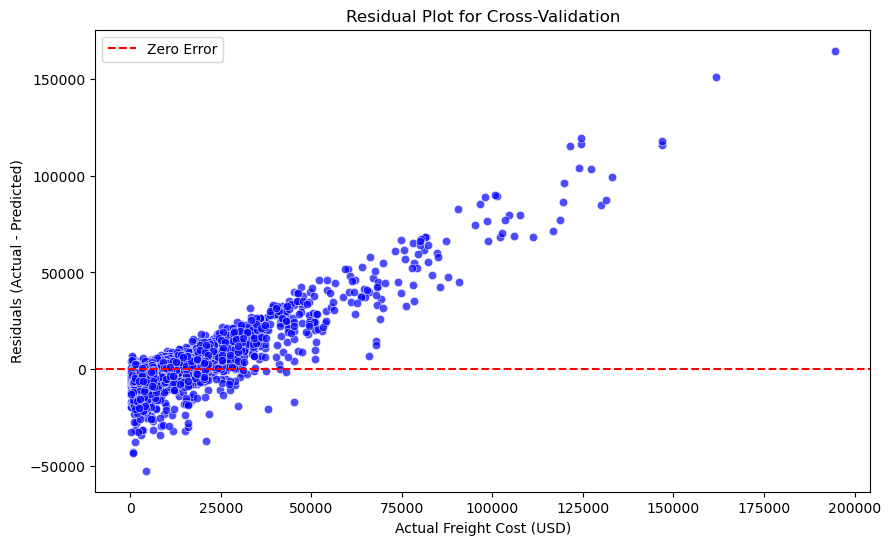

In [28]:
# Residual plot for cross-validation
residuals_cv = cv_actual - cv_preds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cv_actual, y=residuals_cv, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Plot for Cross-Validation')
plt.xlabel('Actual Freight Cost (USD)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()



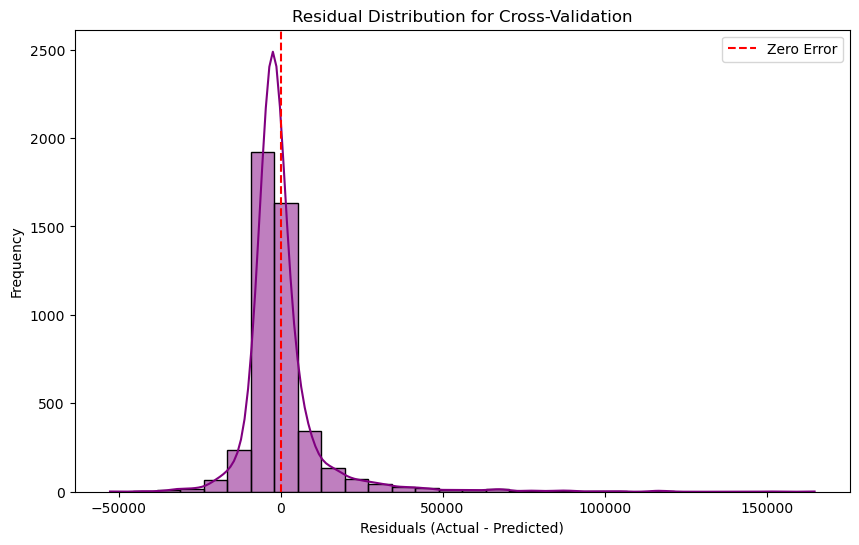

In [29]:
# Distribution of residuals for cross-validation
plt.figure(figsize=(10, 6))
sns.histplot(residuals_cv, bins=30, kde=True, color='purple')
plt.title('Residual Distribution for Cross-Validation')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.show()



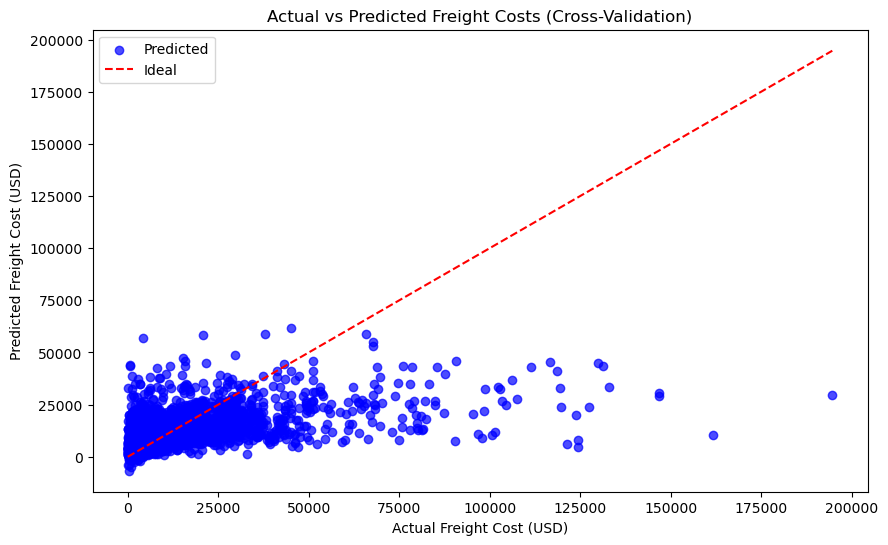

In [30]:
# Scatter plot for Actual vs Predicted values from Cross-Validation
plt.figure(figsize=(10, 6))
plt.scatter(cv_actual, cv_preds, alpha=0.7, color='blue', label='Predicted')
plt.plot([cv_actual.min(), cv_actual.max()], [cv_actual.min(), cv_actual.max()], color='red', linestyle='--', label='Ideal')
plt.title('Actual vs Predicted Freight Costs (Cross-Validation)')
plt.xlabel('Actual Freight Cost (USD)')
plt.ylabel('Predicted Freight Cost (USD)')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'jupyter_dash'